In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# from sklearn.model_selection import KFold
import matplotlib.image as mpimg 
from PIL import Image

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

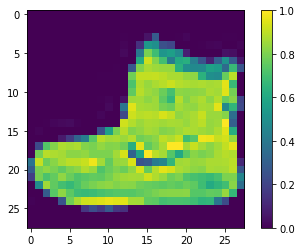

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images = np.expand_dims(train_images,axis=1)
test_images = np.expand_dims(test_images,axis=1)

In [8]:
test_images.shape

(10000, 1, 28, 28)

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=30,kernel_size=2,strides=(1, 1),activation='relu',data_format = "channels_first"),
    keras.layers.MaxPooling2D(pool_size=(2, 2),data_format= "channels_first"),
    keras.layers.Flatten(),    
    keras.layers.Dense(1470, activation='relu'),
    keras.layers.Dense(735, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


W1112 14:10:43.100076 139897468860224 deprecation.py:506] From /home/athannington/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model = keras.models.load_model("fashion_mnist_adam_categorical10_cnn.h5")

W1112 14:10:43.242006 139897468860224 deprecation.py:506] From /home/athannington/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1112 14:10:43.244863 139897468860224 deprecation.py:506] From /home/athannington/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1112 14:10:44.628123 139897468860224 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your mo

In [12]:
# model.fit(train_images, train_labels, epochs=1)

In [13]:
model.evaluate(test_images, test_labels, verbose=1)

10000/10000 [==============================] - 16s 2ms/sample - loss: 0.2729 - acc: 0.9084


[0.2729245614796877, 0.9084]

In [14]:
test_image = Image.open('test_tshirt.jpeg') 

In [16]:
test_image = test_image.resize((28,28))

In [19]:
test_image = np.array(test_image)

In [20]:
test_image = test_image/255.0

In [21]:
test_image = np.resize(test_image,(1,1,28,28))

In [25]:
prediction = model.predict_classes(test_image)

In [26]:
class_names[prediction[0]]

'Pullover'